In [67]:
import os 
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

In [68]:
def get_ba_graph_paths(dataset_dir= "./datasets/"):
    graph_list = []
    for dirpath, _, files in os.walk(dataset_dir):
        for filename in files:
            try:
                if filename.startswith("ba_edgelist") and filename.endswith(".edges"):
                    file_path = os.path.join(dirpath, filename) 
                    graph_list.append((file_path, os.path.splitext(filename)[0]))
            except Exception as e: 
                print(e, f'{filename}')
    return graph_list

In [69]:
import networkx as nx
import pandas as pd


def file_exists(file_path):
    return os.path.isfile(file_path)


def get_graph_paths(dataset_dir= "./datasets/"):
    graph_list = []
    for dirpath, _, files in os.walk(dataset_dir):
        for filename in files:
            try:
                if filename.endswith(".edges"):
                    file_path = os.path.join(dirpath, filename) 
                    graph_list.append((file_path, os.path.splitext(filename)[0]))
            except Exception as e: 
                print(e, f'{filename}')
    return graph_list


def get_sir_graph_paths(net_name, num_b=3,  result_path = './datasets/SIR_Results/'):
    paths= []
    for i in range(num_b):
        sir_dir =os.path.join(result_path, net_name)
        sir_dir = os.path.join(sir_dir, f'{i}.csv')
        paths.append(sir_dir)
    return paths


def get_previously_sim_values(sir_graph_path):
    try:
        df = pd.read_csv(sir_graph_path)
        values = df['Node'].tolist()
        return values
    except OSError as e:
        return []

def getTotalNumNodes(net_name):
    graph_list = get_graph_paths()
    path = ''
    for tmp in graph_list:
        if tmp[1]==net_name:
            path = tmp[0]
            
    G = nx.read_edgelist(path, comments="%", nodetype=int)
    return G.number_of_nodes()


def getSimNumNodes(net_name):
    sir_paths = get_sir_graph_paths(net_name)
    temp = [  len(get_previously_sim_values(path)) for path in sir_paths ]
    return (temp)


def getSortValue(net_edges_path):
    net_edges_path=net_edges_path[0]
    G = nx.read_edgelist(net_edges_path, comments="%", nodetype=int)
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    avg_degree = 2 * num_edges / num_nodes if num_nodes > 0 else 0
    return num_nodes+avg_degree

def getSubList(graphs, index, step):
    sublits = []
    for i in range(index, len(graphs), step):
        sublits.append(graphs[i])
    return sublits




def get_has_duplicates(net_name):
    sir_paths = get_sir_graph_paths(net_name)
    duplicates = []
    for sir_graph_path in sir_paths:
        try:
            # Load the CSV file
            df = pd.read_csv(sir_graph_path)
            # Check for duplicate Node values
            duplicate = df[df.duplicated(subset='Node', keep=False)]['Node'].unique()
            if len(duplicate)>0:
                duplicates.append(duplicate)
            else:
                duplicates.append([])
                
        except OSError as e:
            return []
    union_result = set(duplicates[0]).union(duplicates[1], duplicates[2])
    union_result = list(union_result)
    return True if len (union_result)>0 else False

def get_duplicates(net_name):
    sir_paths = get_sir_graph_paths(net_name)
    duplicates = []
    for sir_graph_path in sir_paths:
        try:
            # Load the CSV file
            df = pd.read_csv(sir_graph_path)
            # Check for duplicate Node values
            duplicate = df[df.duplicated(subset='Node', keep=False)]['Node'].unique()
            if len(duplicate)>0:
                duplicates.append(duplicate)
            else:
                duplicates.append([])
                
        except OSError as e:
            return []
    union_result = set(duplicates[0]).union(duplicates[1], duplicates[2])
    union_result = list(union_result)
    return union_result


In [70]:
temp = get_ba_graph_paths()
for i in temp:
    print(i)
print(len(temp))

('./datasets/BA\\ba_edgelist_1000_10.edges', 'ba_edgelist_1000_10')
('./datasets/BA\\ba_edgelist_1000_20.edges', 'ba_edgelist_1000_20')
('./datasets/BA\\ba_edgelist_1000_4.edges', 'ba_edgelist_1000_4')
('./datasets/BA\\ba_edgelist_2000_10.edges', 'ba_edgelist_2000_10')
('./datasets/BA\\ba_edgelist_2000_20.edges', 'ba_edgelist_2000_20')
('./datasets/BA\\ba_edgelist_2000_4.edges', 'ba_edgelist_2000_4')
('./datasets/BA\\ba_edgelist_3000_10.edges', 'ba_edgelist_3000_10')
('./datasets/BA\\ba_edgelist_3000_20.edges', 'ba_edgelist_3000_20')
('./datasets/BA\\ba_edgelist_3000_4.edges', 'ba_edgelist_3000_4')
('./datasets/BA_EXP\\ba_edgelist_exp1_3000_4.edges', 'ba_edgelist_exp1_3000_4')
('./datasets/BA_EXP\\ba_edgelist_exp1_4000_4.edges', 'ba_edgelist_exp1_4000_4')
('./datasets/BA_EXP\\ba_edgelist_exp1_5000_4.edges', 'ba_edgelist_exp1_5000_4')
('./datasets/BA_EXP\\ba_edgelist_exp1_6000_4.edges', 'ba_edgelist_exp1_6000_4')
('./datasets/BA_EXP\\ba_edgelist_exp1_7000_4.edges', 'ba_edgelist_exp1_700

In [71]:
rmv= ['ba_edgelist_1000_10', "ba_edgelist_1000_20", "ba_edgelist_1000_4", "ba_edgelist_2000_10", "ba_edgelist_2000_20", "ba_edgelist_2000_4", "ba_edgelist_3000_10", "ba_edgelist_3000_20", "ba_edgelist_3000_4"]
temp = [x for x in temp if x[1] not in rmv]
for i in temp:
    print(i)
print(len(temp))

('./datasets/BA_EXP\\ba_edgelist_exp1_3000_4.edges', 'ba_edgelist_exp1_3000_4')
('./datasets/BA_EXP\\ba_edgelist_exp1_4000_4.edges', 'ba_edgelist_exp1_4000_4')
('./datasets/BA_EXP\\ba_edgelist_exp1_5000_4.edges', 'ba_edgelist_exp1_5000_4')
('./datasets/BA_EXP\\ba_edgelist_exp1_6000_4.edges', 'ba_edgelist_exp1_6000_4')
('./datasets/BA_EXP\\ba_edgelist_exp1_7000_4.edges', 'ba_edgelist_exp1_7000_4')
('./datasets/BA_EXP\\ba_edgelist_exp1_8000_4.edges', 'ba_edgelist_exp1_8000_4')
('./datasets/BA_EXP\\ba_edgelist_exp2_2000_10.edges', 'ba_edgelist_exp2_2000_10')
('./datasets/BA_EXP\\ba_edgelist_exp2_2000_20.edges', 'ba_edgelist_exp2_2000_20')
('./datasets/BA_EXP\\ba_edgelist_exp2_2000_4.edges', 'ba_edgelist_exp2_2000_4')
('./datasets/BA_EXP\\ba_edgelist_exp3_4000_10.edges', 'ba_edgelist_exp3_4000_10')
('./datasets/BA_EXP\\ba_edgelist_exp3_4000_2.edges', 'ba_edgelist_exp3_4000_2')
('./datasets/BA_EXP\\ba_edgelist_exp3_4000_6.edges', 'ba_edgelist_exp3_4000_6')
12


In [72]:
print(temp)
list.sort(temp, key=getSortValue)
print(temp)
ba_mch_0 = getSubList(temp, 0, 3)
ba_mch_1 = getSubList(temp, 1, 3)
ba_mch_2 = getSubList(temp, 2, 3)
print(len(ba_mch_0))
print(len(ba_mch_1))
print(len(ba_mch_2))

[('./datasets/BA_EXP\\ba_edgelist_exp1_3000_4.edges', 'ba_edgelist_exp1_3000_4'), ('./datasets/BA_EXP\\ba_edgelist_exp1_4000_4.edges', 'ba_edgelist_exp1_4000_4'), ('./datasets/BA_EXP\\ba_edgelist_exp1_5000_4.edges', 'ba_edgelist_exp1_5000_4'), ('./datasets/BA_EXP\\ba_edgelist_exp1_6000_4.edges', 'ba_edgelist_exp1_6000_4'), ('./datasets/BA_EXP\\ba_edgelist_exp1_7000_4.edges', 'ba_edgelist_exp1_7000_4'), ('./datasets/BA_EXP\\ba_edgelist_exp1_8000_4.edges', 'ba_edgelist_exp1_8000_4'), ('./datasets/BA_EXP\\ba_edgelist_exp2_2000_10.edges', 'ba_edgelist_exp2_2000_10'), ('./datasets/BA_EXP\\ba_edgelist_exp2_2000_20.edges', 'ba_edgelist_exp2_2000_20'), ('./datasets/BA_EXP\\ba_edgelist_exp2_2000_4.edges', 'ba_edgelist_exp2_2000_4'), ('./datasets/BA_EXP\\ba_edgelist_exp3_4000_10.edges', 'ba_edgelist_exp3_4000_10'), ('./datasets/BA_EXP\\ba_edgelist_exp3_4000_2.edges', 'ba_edgelist_exp3_4000_2'), ('./datasets/BA_EXP\\ba_edgelist_exp3_4000_6.edges', 'ba_edgelist_exp3_4000_6')]
[('./datasets/BA_EXP\

In [73]:
print('ba_mch_0:')
for i in ba_mch_0:
    print(i)


print('ba_mch_1:')
for i in ba_mch_1:
    print(i)


print('ba_mch_2:')
for i in ba_mch_2:
    print(i)

ba_mch_0:
('./datasets/BA_EXP\\ba_edgelist_exp2_2000_4.edges', 'ba_edgelist_exp2_2000_4')
('./datasets/BA_EXP\\ba_edgelist_exp1_3000_4.edges', 'ba_edgelist_exp1_3000_4')
('./datasets/BA_EXP\\ba_edgelist_exp3_4000_6.edges', 'ba_edgelist_exp3_4000_6')
('./datasets/BA_EXP\\ba_edgelist_exp1_6000_4.edges', 'ba_edgelist_exp1_6000_4')
ba_mch_1:
('./datasets/BA_EXP\\ba_edgelist_exp2_2000_10.edges', 'ba_edgelist_exp2_2000_10')
('./datasets/BA_EXP\\ba_edgelist_exp3_4000_2.edges', 'ba_edgelist_exp3_4000_2')
('./datasets/BA_EXP\\ba_edgelist_exp3_4000_10.edges', 'ba_edgelist_exp3_4000_10')
('./datasets/BA_EXP\\ba_edgelist_exp1_7000_4.edges', 'ba_edgelist_exp1_7000_4')
ba_mch_2:
('./datasets/BA_EXP\\ba_edgelist_exp2_2000_20.edges', 'ba_edgelist_exp2_2000_20')
('./datasets/BA_EXP\\ba_edgelist_exp1_4000_4.edges', 'ba_edgelist_exp1_4000_4')
('./datasets/BA_EXP\\ba_edgelist_exp1_5000_4.edges', 'ba_edgelist_exp1_5000_4')
('./datasets/BA_EXP\\ba_edgelist_exp1_8000_4.edges', 'ba_edgelist_exp1_8000_4')


## sort files



In [74]:

di = {}
di['BA_mch_0'] = [item[1] for item in ba_mch_0]
# di['BA_mch_0'].append('ChicagoRegional')
# di['BA_mch_0'].append('ia-crime-moreno')
di['BA_mch_0'].append('p2p-Gnutella04')
# di['BA_mch_0'].append('jazz')
di['BA_mch_0'].append('LastFM')


di['BA_mch_1'] = [item[1] for item in ba_mch_1]
# di['BA_mch_1'].append('sex')
di['BA_mch_1'].append('powergrid')
di['BA_mch_1'].append('vidal')
di['BA_mch_1'].append('politician_edges')



di['BA_mch_2'] = [item[1] for item in ba_mch_2]
# di['BA_mch_2'].append('maybe-PROTEINS-full')
# di['BA_mch_2'].append('arenas-pgp')

# di['negin_mch'] = ['CA-GrQc', 'CA-HepTh', 'faa', 'facebook_combined', 'figeys', 'email', 'NS', 'Peh_edge', 'Stelzl', 'tvshow_edges', 'web-EPA']
di['negin_mch'] = ['CA-GrQc', 'CA-HepTh', 'facebook_combined', 'figeys', 'email', 'Peh_edge', 'Stelzl', 'tvshow_edges', 'web-EPA', 'arenas-pgp']
di['mhd_mch'] = [ 'ChicagoRegional', 'ia-crime-moreno', 'maybe-PROTEINS-full', 'NS', 'faa',                  'jazz', 'sex']   #TODO: THESE TWO LAST ONES SHOULD BE DONE LATERd

write_to_mch_json = False
if write_to_mch_json:
    with open('machine.json', 'w') as f:
        json.dump(di, f)

In [75]:

with open('machine.json', 'r') as file:
    di = json.load(file)

print(di)

{'BA_mch_0': ['ba_edgelist_exp1_3000_4', 'ba_edgelist_exp3_4000_6', 'ba_edgelist_exp1_6000_4', 'p2p-Gnutella04', 'LastFM'], 'BA_mch_1': ['ba_edgelist_exp2_2000_10', 'ba_edgelist_exp3_4000_2', 'ba_edgelist_exp3_4000_10', 'ba_edgelist_exp1_7000_4', 'vidal', 'politician_edges'], 'BA_mch_2': ['ba_edgelist_exp2_2000_20', 'ba_edgelist_exp1_4000_4', 'ba_edgelist_exp1_5000_4', 'ba_edgelist_exp2_2000_4'], 'negin_mch': ['CA-GrQc', 'CA-HepTh', 'facebook_combined', 'figeys', 'email', 'Peh_edge', 'Stelzl', 'tvshow_edges', 'web-EPA', 'arenas-pgp', 'powergrid', 'ba_edgelist_exp1_8000_4', 'maybe-PROTEINS-full'], 'mhd_mch': ['jazz', 'NS', 'faa', 'ba_edgelist_1000_4', 'ia-crime-moreno', 'sex', 'ChicagoRegional']}


## ANALYSIS

In [76]:

notsorted = [] 
noteq = []
completed = []
incomplete = []
temp = False
net_has_duplicate_name = []

for mch in di.keys():
    # if not mch=='BA_mch_1':
    #     continue
    print(mch, ": ")
    i = 0

    t_=0
    s_=0
    for net in di[mch]:
        has_duplicates = get_has_duplicates(net)
        temp = False
        i+=1
        simNodes = getSimNumNodes(net)
        totalNumNodes = getTotalNumNodes(net)
        t_+=totalNumNodes
        s_+=simNodes[0]
        sortd = sorted(get_previously_sim_values(get_sir_graph_paths(net)[0])) ==get_previously_sim_values(get_sir_graph_paths(net)[0])
        if simNodes[0] >= totalNumNodes:
            temp = True
            completed.append(net)
        else: 
            incomplete.append(net)
        if not sortd :
            # if mch == 'negin_mch':
            notsorted.append(net)
            print('### ', i, ".", net, "  process:", simNodes, '/',  totalNumNodes, 'completed: ',temp,  ' sorted:', sortd, '### ')
        elif not( simNodes[0]==simNodes[1] and simNodes[1]==simNodes[2]) :
            noteq.append(net)
            print('$$$ ', i, ".", net, "  process:", simNodes, '/',  totalNumNodes, 'completed: ',temp,  ' sorted:', sortd, ('$$$ '))
        else:
            print( i, ".", net, "  process:", simNodes, '/',  totalNumNodes, 'completed: ',temp,  ' sorted:', sortd)
        if has_duplicates:
            net_has_duplicate_name.append(net)
            print("@@@@@@@@@@@@ has duplicate nodes in the node list, duplicates: ", get_duplicates(net))
    print("SIM NUM NODES / TOTAL NUM NODES: ",s_, ' / ', t_)
    try:
        print("percentage: ",(s_/ t_)*100)
    except ZeroDivisionError:
        print("percentage: ZeroDivisionError  :",s_, '/', t_ )

    print("COMPLETED: ", completed)
    print("INCOMPLETED: ", incomplete)

    completed=[]
    incomplete = []
    print("-----------------")


BA_mch_0 : 
1 . ba_edgelist_exp1_3000_4   process: [3000, 3000, 3000] / 3000 completed:  True  sorted: True
2 . ba_edgelist_exp3_4000_6   process: [4000, 4000, 4000] / 4000 completed:  True  sorted: True
3 . ba_edgelist_exp1_6000_4   process: [6000, 6000, 6000] / 6000 completed:  True  sorted: True
4 . p2p-Gnutella04   process: [2489, 2489, 2489] / 10876 completed:  False  sorted: True
5 . LastFM   process: [7987, 7987, 7987] / 7624 completed:  True  sorted: True
@@@@@@@@@@@@ has duplicate nodes in the node list, duplicates:  [np.int64(5502), np.int64(5503), np.int64(5504), np.int64(5505), np.int64(5506), np.int64(5507), np.int64(5508), np.int64(5509), np.int64(5510), np.int64(5511), np.int64(5512), np.int64(5513), np.int64(5514), np.int64(5515), np.int64(5516), np.int64(5517), np.int64(5518), np.int64(5519), np.int64(5520), np.int64(5521), np.int64(5522), np.int64(5523), np.int64(5524), np.int64(5525), np.int64(5526), np.int64(5527), np.int64(5528), np.int64(5529), np.int64(5530), np.

## max value of column infected_sum

In [77]:
max_infected_sum = float('-inf')  # Initialize to negative infinity
for mch in di.keys():
    # print(mch, ": ")
    for net in di[mch]:
        sir_paths = get_sir_graph_paths(net)
        # print(sir_paths)
        for file in sir_paths:
            if file_exists(file):
                df = pd.read_csv(file)
                # print(df['Infected_sum'].max())
                max_infected_sum = max(max_infected_sum, df['Infected_sum'].max())
print(max_infected_sum)

0


## Sort and save

In [78]:
run = False

In [79]:
if run:
    for net in notsorted:
        sir_paths = get_sir_graph_paths(net)
        i = 0
        for path in sir_paths:
            i+=1
            df = pd.read_csv(path)
            df_sorted = df.sort_values(by='Node')
            df_sorted.to_csv(path, index=False)

In [80]:
for net in notsorted:
    print(net)

## REMOVE full duplicate rows

In [81]:
print(net_has_duplicate_name)

['LastFM']


In [82]:

def remove_full_duplicates(net_name):
    sir_paths = get_sir_graph_paths(net_name)
    for sir_graph_path in sir_paths:
        try:
            # Load the CSV file with explicit data types
            df = pd.read_csv(sir_graph_path, dtype={'Node': int, 'SIR': float, 'Infected_sum': int})
            
            # Remove fully duplicated rows, ensuring all columns are considered
            df_cleaned = df.drop_duplicates(subset=['Node', 'SIR', 'Infected_sum'])
            
            # Overwrite the original CSV file with the cleaned data
            df_cleaned.to_csv(sir_graph_path, index=False)
            original_count = len(df)
            cleaned_count = len(df_cleaned)
            if original_count > cleaned_count:
                print(f" + File {sir_graph_path} updated, fully duplicated rows removed.")
            else:
                print(f" - no FULLY duplicate rows in File {sir_graph_path}.")

        except OSError as e:
            print("Error reading file:", e)

if False:
    for net in net_has_duplicate_name:
        print("net: ", net)
        remove_full_duplicates(net)

In [83]:
def average_node_values(net_name):
    sir_paths = get_sir_graph_paths(net_name)
    for sir_graph_path in sir_paths:
        try:
            # Load the CSV file
            df = pd.read_csv(sir_graph_path)
            
            # Group by 'Node' and calculate the mean for the other columns
            df_avg = df.groupby('Node', as_index=False).mean()
            df_avg['Infected_sum'] = df_avg['Infected_sum'].astype(int)
            df_avg['SIR'] = df_avg['SIR'].round(7)
            
            # Overwrite the original CSV file with the averaged data
            df_avg.to_csv(sir_graph_path, index=False)
            
            print(f"CSV file {sir_graph_path} updated: Averaged rows for nodes with duplicate entries.")
            
        except OSError as e:
            print(f"Error reading file: {e}")
            
if False:
    for net in net_has_duplicate_name:
        print("net: ", net)
        average_node_values(net)

## Checking for precision

In [84]:

def check_sir_precision_and_plot(csv_file_path, name):
    # Load the CSV file into a DataFrame
    data = None
    if file_exists(csv_file_path):
        data = pd.read_csv(csv_file_path)
    else:
        return 0
    
    # Check if the 'SIR' column exists
    if 'SIR' not in data.columns:
        raise ValueError("The 'SIR' column does not exist in the provided CSV file.")

    # Extract the SIR values
    sir_values = data['SIR']
    
    # Check the precision of each value (5 or 3 decimal places)
    rounded_to_5 = sir_values.apply(lambda x: len(str(x).split(".")[1]) == 5 if "." in str(x) else False).sum()
    rounded_to_3 = sir_values.apply(lambda x: len(str(x).split(".")[1]) == 3 if "." in str(x) else False).sum()
    
    
    # if rounded_to_3 == 0 or (rounded_to_3 > 0 and rounded_to_5 > 0) :
    if name=='maybe-PROTEINS-full' or name== 'ChicagoRegional':
        return  0
    
    print(name)
    # Print the results
    print(f"Values rounded to 5 digits after the point: {rounded_to_5}")
    print(f"Values rounded to 3 digits after the point: {rounded_to_3}")

    # Plot the histogram of the SIR values
    plt.figure(figsize=(10, 6))
    plt.hist(sir_values, bins=30, edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of Influential Scale value {name}")
    plt.xlabel("IS")
    plt.ylabel("Frequency")
    # plt.show()
    # plt.savefig(f"./sir_labeling/images/prec_3/hist_sir_prec3_{name}.png", dpi=300, bbox_inches='tight')
    plt.savefig(f"./sir_labeling/images/prec_5/hist_sir_prec5_{name}.png", dpi=300, bbox_inches='tight')
    plt.show()

    return rounded_to_3

# Example usage
# check_sir_precision_and_plot("path_to_your_csv_file.csv")
if False:

    sum_redo_nodes = 0
    for mch in di.keys():
        print(mch, ": ")
        mch_sum=0
        for net in di[mch]:
            sir_paths = get_sir_graph_paths(net)
            redo_nodes= check_sir_precision_and_plot(sir_paths[0], net)
            sum_redo_nodes+=redo_nodes
            mch_sum+=redo_nodes
        print(f"this machine {mch} has to do {mch_sum}")
    print(sum_redo_nodes)


In [85]:
def remove_sir_with_3_digit_precision(csv_file_path, output_file_path):
    # Load the CSV file into a DataFrame
    data = pd.read_csv(csv_file_path)
    
    # Check if the 'SIR' column exists
    if 'SIR' not in data.columns:
        raise ValueError("The 'SIR' column does not exist in the provided CSV file.")

    # Remove rows where 'SIR' values have 3 decimal places
    filtered_data = data[~data['SIR'].apply(lambda x: len(str(x).split(".")[1]) == 3 if "." in str(x) else False)]

    # Save the filtered DataFrame to a new CSV file
    filtered_data.to_csv(output_file_path, index=False)
    print(f"Filtered data saved to {output_file_path}")


if False:

    for mch in di.keys():
        for net in di[mch]:
            sir_paths = get_sir_graph_paths(net)
            if check_sir_precision_and_plot(sir_paths[0], net)>0:
                remove_sir_with_3_digit_precision(sir_paths[0], sir_paths[0])
                remove_sir_with_3_digit_precision(sir_paths[1], sir_paths[1])
                remove_sir_with_3_digit_precision(sir_paths[2], sir_paths[2])
        print(f"this machine {mch} has to do {mch_sum}")
    print(sum_redo_nodes)


## SIR Result Convergence point of the different graphs

# time taken

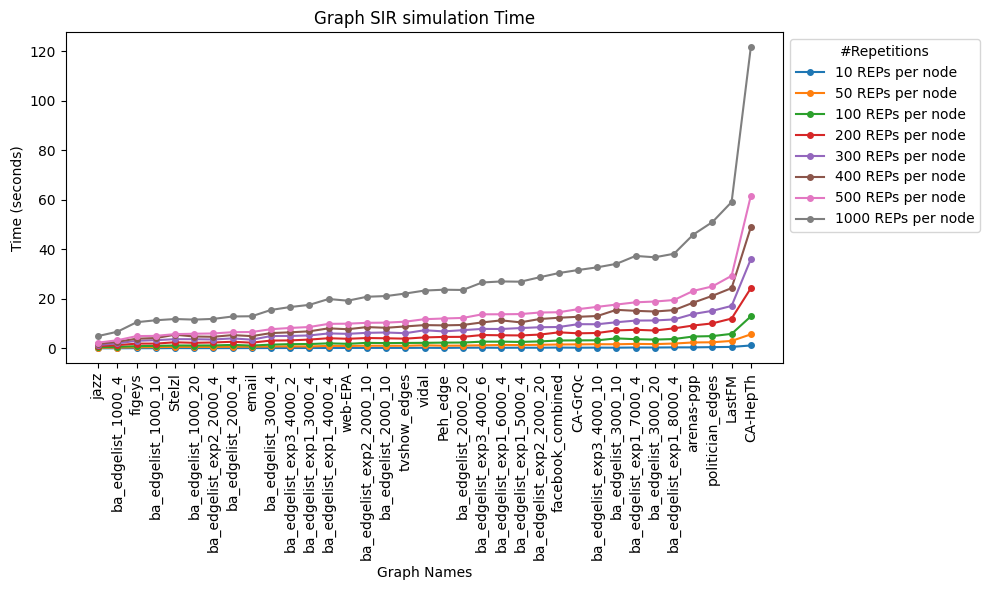

In [86]:
data = None
# Load the JSON file
with open('./all_execution_times.json', 'r') as f:
    data = json.load(f)

# Sorting the graphs based on a reference value (e.g., "500")
reference_value = "500"
sorted_graphs = sorted(data.items(), key=lambda item: item[1][reference_value])

# Reordering data based on sorted graphs
sorted_data = {key: data[key] for key, _ in sorted_graphs}

# Extract x values and y values for sorted data
x_values_sorted = list(sorted_data.keys())
x_positions_sorted = range(len(x_values_sorted))

# Prepare plot for each line with sorted data
fig, ax = plt.subplots(figsize=(10, 6))

for value in ["10", "50", "100", "200", "300", "400", "500", "1000"]:
    y_values_sorted = [graph[value] for graph in sorted_data.values()]
    ax.plot(x_positions_sorted, y_values_sorted, marker='o',markersize=4, label=f"{value} REPs per node")

# Customize the plot
ax.set_title("Graph SIR simulation Time")
ax.set_xticks(x_positions_sorted)
ax.set_xticklabels(x_values_sorted, rotation=90)
ax.set_ylabel("Time (seconds)")
ax.set_xlabel("Graph Names")
ax.legend(title="#Repetitions", loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [87]:
sorted_data.keys()
avg_degree= []
num_nodes= []

In [88]:
def get_graph_path(g_name):
    for g in get_graph_paths():
        if g[1]==g_name:
            return g[0]
        
lst = [get_graph_path(g) for g in sorted_data.keys()]  

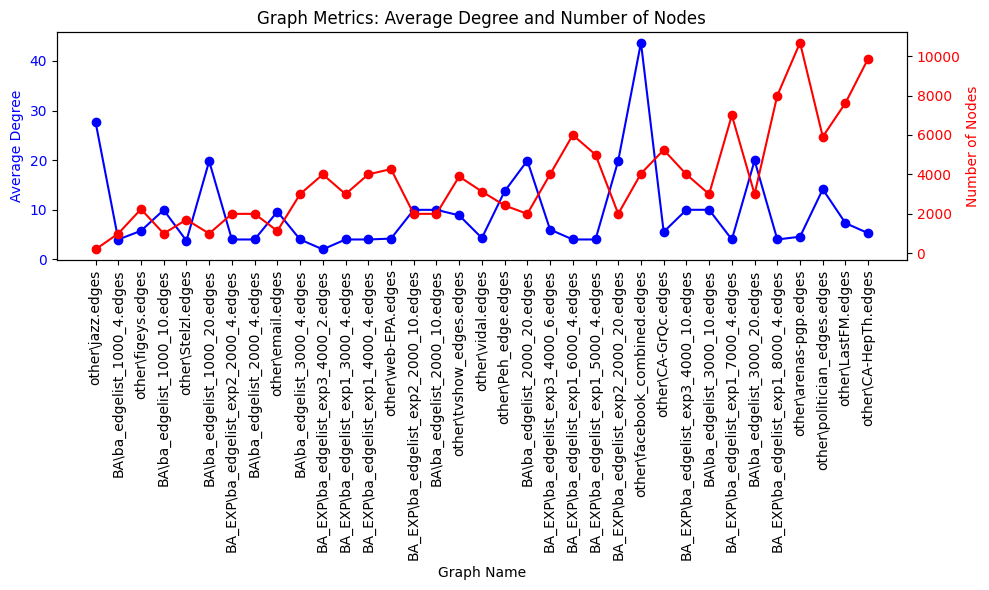

In [89]:
# Function to calculate average degree and number of nodes for a set of graph files
def calculate_graph_metrics(graph_paths):
    avg_degrees = []
    num_nodes = []
    graph_names = []

    for path in graph_paths:
        try:
            # Load graph from edgelist
            G = nx.read_edgelist(path)
            # Calculate average degree
            avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
            # Append metrics
            avg_degrees.append(avg_degree)
            num_nodes.append(G.number_of_nodes())
            graph_names.append(path.split('/')[-1])  # Extract graph name from path
        except Exception as e:
            print(f"Error processing {path}: {e}")
    
    return graph_names, avg_degrees, num_nodes


# Calculate metrics
graph_names, avg_degrees, num_nodes = calculate_graph_metrics(lst)

# Plot the metrics
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot average degree
ax1.plot(graph_names, avg_degrees, 'o-', color='b', label='Average Degree')
ax1.set_xlabel('Graph Name')
ax1.set_ylabel('Average Degree', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks(range(len(graph_names)))
ax1.set_xticklabels(graph_names, rotation=90)

# Create a second y-axis for number of nodes
ax2 = ax1.twinx()
ax2.plot(graph_names, num_nodes, 'o-', color='r', label='Number of Nodes')
ax2.set_ylabel('Number of Nodes', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and grid
plt.title('Graph Metrics: Average Degree and Number of Nodes')
plt.grid(axis='x', linestyle='--', alpha=0.7)
fig.tight_layout()

plt.show()


In [90]:

time_exec =  {
    "10": 0.37,
    "50": 1.83,
    "100": 3.72,
    "200": 7.52,
    "300": 11.24,
    "400": 15.17,
    "500": 18.62,
    "1000": 37.34
}
for val in time_exec.values():
    print(val, "  ", val*7000, "   ", val*7000/3600)

0.37    2590.0     0.7194444444444444
1.83    12810.0     3.558333333333333
3.72    26040.0     7.233333333333333
7.52    52640.0     14.622222222222222
11.24    78680.0     21.855555555555554
15.17    106190.0     29.497222222222224
18.62    130340.0     36.205555555555556
37.34    261380.00000000003     72.60555555555557


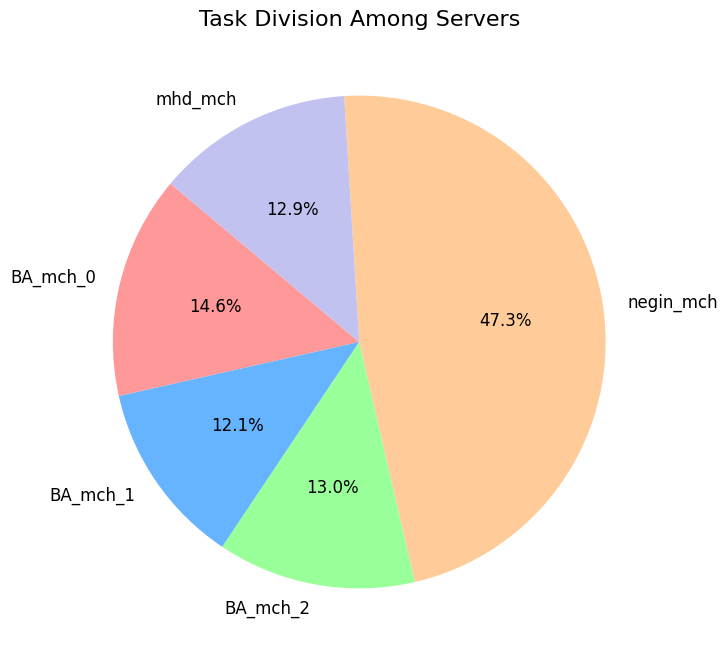

In [ ]:

# Data for the circle plot
labels = ['BA_mch_0', 'BA_mch_1', 'BA_mch_2', 'negin_mch', 'mhd_mch']
sizes = [31500, 26041, 28000, 101912, 27799]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 12})
plt.title('Task Division Among Servers', fontsize=16)
plt.show()

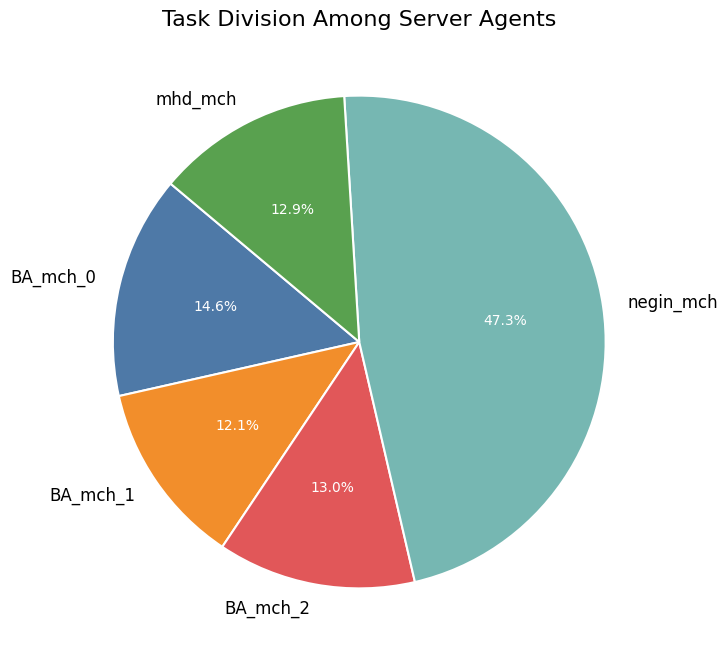

In [97]:
import matplotlib.pyplot as plt

# Data for the circle plot
labels = ['BA_mch_0', 'BA_mch_1', 'BA_mch_2', 'negin_mch', 'mhd_mch']
sizes = [31500, 26041, 28000, 101912, 27799]
colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F']

# Create the pie chart with improved visuals
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=140, 
    colors=colors, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

# Enhance text and chart appearance
for text in autotexts:
    text.set_color('white')
    text.set_fontsize(10)

plt.title('Task Division Among Server Agents', fontsize=16)
plt.show()
